In [5]:
# This notebook performs random radius search on the dataset
import numpy as np
import pickle
import torch
import time
import random

In [6]:
# load data from 'input_output.pkl'.
X = pickle.load(open('input_output.pkl', 'rb'))['x']
print("shape of X:", np.shape(X))

y = pickle.load(open('input_output.pkl', 'rb'))['y']
print("shape of y:", np.shape(y))

num_vectors = pickle.load(open('input_output.pkl', 'rb'))['num_vectors']
print("# vectors:", num_vectors)

shape of X: (25877, 151)
shape of y: (25877,)
# vectors: 25877


In [8]:
x_copy = np.copy(X)
y_copy = np.copy(y)

inputs_sampled = []
outputs_sampled = []
current_center_output_per_iteration = []

num_calls = 150
num_vectors_to_remove_per_iteration = ((num_vectors - num_calls) / num_calls)
# Assuming your input vectors are stored in 'input_array' and outputs in 'output_array'
# 'target_input' is the specific input vector you want to use as a reference

current_center = np.arange(np.shape(X)[1])
current_center_output = -1.0

num_to_remove = 0.0

for i in range(num_calls):
    random_index = np.random.randint(len(x_copy))
    selected_input = x_copy[random_index]
    selected_output = y_copy[random_index]

    x_copy = np.delete(x_copy, random_index, axis=0)
    y_copy = np.delete(y_copy, random_index)

    if (current_center_output < selected_output):
        current_center = selected_input
        current_center_output = selected_output

    inputs_sampled.append(selected_input)
    outputs_sampled.append(selected_output)
    current_center_output_per_iteration.append(current_center_output)

    distances = np.linalg.norm(x_copy - current_center, axis=1)
    # Create an array of indices to keep track of the original order
    indices = np.arange(len(distances))
    # Sort the indices based on distances
    sorted_indices = indices[np.argsort(distances)]

    num_to_remove = num_to_remove + num_vectors_to_remove_per_iteration
    # Keep the top 5900 pairs
    top_indices = sorted_indices[:(len(indices) - int(num_to_remove))]
    num_to_remove = num_to_remove - int(num_to_remove)

    x_copy = x_copy[top_indices]
    y_copy = y_copy[top_indices]

    print("Iteration #", i)
    print("num_vectors remaining: ", len(x_copy))
    print("Best output found: ", current_center_output)

#print(inputs_sampled)
print(outputs_sampled)
#print(current_center_output_per_iteration)

Iteration # 0
num_vectors remaining:  25705
Best output found:  0.167027085
Iteration # 1
num_vectors remaining:  25532
Best output found:  1.171907579
Iteration # 2
num_vectors remaining:  25360
Best output found:  1.171907579
Iteration # 3
num_vectors remaining:  25187
Best output found:  2.710985889
Iteration # 4
num_vectors remaining:  25015
Best output found:  2.710985889
Iteration # 5
num_vectors remaining:  24842
Best output found:  2.710985889
Iteration # 6
num_vectors remaining:  24670
Best output found:  2.710985889
Iteration # 7
num_vectors remaining:  24497
Best output found:  3.678592527
Iteration # 8
num_vectors remaining:  24325
Best output found:  3.678592527
Iteration # 9
num_vectors remaining:  24152
Best output found:  3.678592527
Iteration # 10
num_vectors remaining:  23980
Best output found:  3.678592527
Iteration # 11
num_vectors remaining:  23807
Best output found:  3.678592527
Iteration # 12
num_vectors remaining:  23635
Best output found:  3.678592527
Iteration

In [18]:
# Let's run the above a 50 times and get the average:
# We will also measure the time taken for run
import time

# runs_inputs_sampled = []
# runs_outputs_sampled = []
runs_current_center_output_per_iteration = []
time_elapsed_per_run = []

for run in range(50):
    start_time = time.time()
    x_copy = np.copy(X)
    y_copy = np.copy(y)

    # inputs_sampled = []
    # outputs_sampled = []
    current_center_output_per_iteration = []

    num_calls = 150
    num_vectors_to_remove_per_iteration = ((num_vectors - num_calls) / num_calls)

    current_center = np.arange(np.shape(X)[1])
    current_center_output = -1.0
    num_to_remove = 0.0

    for i in range(num_calls):
        random_index = np.random.randint(len(x_copy))
        selected_input = x_copy[random_index]
        selected_output = y_copy[random_index]

        x_copy = np.delete(x_copy, random_index, axis=0)
        y_copy = np.delete(y_copy, random_index)

        if (current_center_output < selected_output):
            current_center = selected_input
            current_center_output = selected_output

        # inputs_sampled.append(selected_input)
        # outputs_sampled.append(selected_output)
        current_center_output_per_iteration.append(current_center_output)

        distances = np.linalg.norm(x_copy - current_center, axis=1)
        # Create an array of indices to keep track of the original order
        indices = np.arange(len(distances))
        # Sort the indices based on distances
        sorted_indices = indices[np.argsort(distances)]

        num_to_remove = num_to_remove + num_vectors_to_remove_per_iteration
        # Keep the top pairs
        top_indices = sorted_indices[:(len(indices) - int(num_to_remove))]
        num_to_remove = num_to_remove - int(num_to_remove)

        x_copy = x_copy[top_indices]
        y_copy = y_copy[top_indices]
    
    end_time = time.time()
    elapsed_time = (end_time - start_time)
    time_elapsed_per_run.append(elapsed_time)
    
    print("Run #", (run+1), " completed in ", elapsed_time, " seconds! Results | Best: ", current_center_output_per_iteration[len(current_center_output_per_iteration) - 1])
    # runs_inputs_sampled.append(inputs_sampled)
    # runs_outputs_sampled.append(outputs_sampled)
    runs_current_center_output_per_iteration.append(current_center_output_per_iteration)


Run # 1  completed in  1.99269700050354  seconds! Results | Best:  7.552497342
Run # 2  completed in  1.970336675643921  seconds! Results | Best:  8.156235498
Run # 3  completed in  1.9229090213775635  seconds! Results | Best:  8.361778896
Run # 4  completed in  1.9676764011383057  seconds! Results | Best:  7.522828494
Run # 5  completed in  1.9289829730987549  seconds! Results | Best:  6.213928607
Run # 6  completed in  1.9587817192077637  seconds! Results | Best:  6.683286094
Run # 7  completed in  1.9230155944824219  seconds! Results | Best:  7.10652252
Run # 8  completed in  1.9553520679473877  seconds! Results | Best:  7.875021518
Run # 9  completed in  1.9573209285736084  seconds! Results | Best:  7.367712363
Run # 10  completed in  1.9754855632781982  seconds! Results | Best:  8.764478768
Run # 11  completed in  1.9682509899139404  seconds! Results | Best:  8.751632419
Run # 12  completed in  1.9339115619659424  seconds! Results | Best:  7.037499153
Run # 13  completed in  1.954

In [19]:
np_to_plot_rrs = np.array(runs_current_center_output_per_iteration)
print(np_to_plot_rrs)

[[4.23177690e-01 4.23177690e-01 4.23177690e-01 ... 7.55249734e+00
  7.55249734e+00 7.55249734e+00]
 [4.96512637e+00 4.96512637e+00 4.96512637e+00 ... 8.15623550e+00
  8.15623550e+00 8.15623550e+00]
 [2.73136500e-03 7.88902750e-02 5.66577026e-01 ... 8.36177890e+00
  8.36177890e+00 8.36177890e+00]
 ...
 [4.17017468e-01 5.19728725e-01 5.19728725e-01 ... 6.28757468e+00
  6.28757468e+00 6.28757468e+00]
 [1.15503060e-01 4.43012331e-01 6.36216499e-01 ... 8.11482836e+00
  8.11482836e+00 8.11482836e+00]
 [4.49588669e-01 6.44639348e-01 2.24007538e+00 ... 8.00502978e+00
  8.00502978e+00 8.00502978e+00]]


In [20]:
with open('rrs_results.pkl', 'wb') as file:
    pickle.dump({'np_to_plot_rrs': np_to_plot_rrs, 'time_elapsed_per_run': time_elapsed_per_run}, file)

In [11]:
# Now, let's run standard random search:

x_copy = np.copy(X)
y_copy = np.copy(y)
runs_random_best = []

random_best = []
current_best_output = -1.0
current_best_input = np.arange(np.shape(X)[1])



for i in range(num_calls):
    random_index = np.random.randint(len(x_copy))
    selected_input = x_copy[random_index]
    selected_output = y_copy[random_index]

    x_copy = np.delete(x_copy, random_index, axis=0)
    y_copy = np.delete(y_copy, random_index)

    if (current_best_output < selected_output):
        current_best_input = selected_input
        current_best_output = selected_output

    random_best.append(current_best_output)


print(current_best_output)
print(random_best)


8.114828365
[0.187703861, 0.362864251, 0.438670857, 0.438670857, 0.438670857, 0.438670857, 0.438670857, 0.438670857, 2.816525978, 2.816525978, 2.816525978, 2.816525978, 3.577260114, 3.577260114, 3.577260114, 3.577260114, 3.577260114, 3.577260114, 3.577260114, 3.577260114, 3.577260114, 3.577260114, 3.577260114, 3.577260114, 3.577260114, 3.577260114, 3.577260114, 3.577260114, 5.107702533, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493, 6.182269493,

In [12]:
# Now, let's run standard random search 50 times to get an average:

runs_random_best = []
for run in range(50):

    x_copy = np.copy(X)
    y_copy = np.copy(y)

    random_best = []
    current_best_output = -1.0
    current_best_input = np.arange(np.shape(X)[1])

    for i in range(num_calls):
        random_index = np.random.randint(len(x_copy))
        selected_input = x_copy[random_index]
        selected_output = y_copy[random_index]

        x_copy = np.delete(x_copy, random_index, axis=0)
        y_copy = np.delete(y_copy, random_index)

        if (current_best_output < selected_output):
            current_best_input = selected_input
            current_best_output = selected_output

        random_best.append(current_best_output)

    print("Run # ", (run + 1), " | Best: ", current_best_output)

    runs_random_best.append(random_best)


print(runs_random_best)


Run #  1  | Best:  7.197749572
Run #  2  | Best:  7.796910528
Run #  3  | Best:  8.114828365
Run #  4  | Best:  7.040062117
Run #  5  | Best:  7.840250286
Run #  6  | Best:  8.487273787
Run #  7  | Best:  7.040062117
Run #  8  | Best:  6.994135443
Run #  9  | Best:  7.31724722
Run #  10  | Best:  7.469259715
Run #  11  | Best:  6.22110883
Run #  12  | Best:  7.66255487
Run #  13  | Best:  6.669071179
Run #  14  | Best:  7.70449273
Run #  15  | Best:  6.605729978
Run #  16  | Best:  7.052871372
Run #  17  | Best:  5.887723501
Run #  18  | Best:  7.444694228
Run #  19  | Best:  8.764478768
Run #  20  | Best:  7.70449273
Run #  21  | Best:  7.089116993
Run #  22  | Best:  7.469223505
Run #  23  | Best:  7.983094973
Run #  24  | Best:  6.183734783
Run #  25  | Best:  8.005029785
Run #  26  | Best:  6.805928403
Run #  27  | Best:  6.053655532
Run #  28  | Best:  7.052871372
Run #  29  | Best:  7.66255487
Run #  30  | Best:  7.573327101
Run #  31  | Best:  7.0491657
Run #  32  | Best:  7.204

In [13]:
np_to_plot_rs = np.array(runs_random_best)
print(np_to_plot_rs)

[[4.35768509 4.35768509 4.35768509 ... 7.19774957 7.19774957 7.19774957]
 [0.01605199 0.34494649 0.36208653 ... 7.79691053 7.79691053 7.79691053]
 [0.12956056 5.85717034 5.85717034 ... 8.11482836 8.11482836 8.11482836]
 ...
 [0.49257179 0.49257179 0.49257179 ... 7.0865689  7.0865689  7.0865689 ]
 [3.00617813 3.00617813 3.00617813 ... 7.90100046 7.90100046 7.90100046]
 [0.10844987 0.47364587 0.47364587 ... 8.42769894 8.42769894 8.42769894]]


In [ ]:
with open('rs_results.pkl', 'wb') as file:
    pickle.dump(np_to_plot_rs, file)

In [14]:
# And finally, to plot:
rrs_y = []
rs_y = []
for i in range(num_calls):
    sum_rrs = 0.0
    sum_rs = 0.0
    for j in range(50):
        sum_rrs = sum_rrs + np_to_plot_rrs[j][i]
        sum_rs = sum_rs + np_to_plot_rs[j][i]

    sum_rrs = sum_rrs / 50.0
    sum_rs = sum_rs / 50.0
    rrs_y.append(sum_rrs)
    rs_y.append(sum_rs)


print("Random Radius Search: ", rrs_y)
print("Random Search: ", rs_y)



Random Radius Search:  [1.0397428528000001, 1.9201773816599996, 2.1480069086799998, 2.4162854981599997, 2.75757160054, 3.296689685540001, 3.553433169980001, 3.7809286368000006, 3.8476917820000005, 4.25333198578, 4.27148952614, 4.378638656440001, 4.47745921272, 4.52757047878, 4.6237250974, 4.66980593314, 4.86669927158, 4.9870036858599995, 4.99634945698, 5.037381281679999, 5.07802320832, 5.1563274872, 5.2327554212, 5.322456959140001, 5.532806007900001, 5.532806007900001, 5.587796852140001, 5.60237438716, 5.60237438716, 5.652628900520001, 5.71419279104, 5.76391486776, 5.768729823039999, 5.7778169652199995, 5.851253724719999, 5.919221297099999, 5.925617230179999, 5.925617230179999, 5.94796481898, 6.00947024298, 6.025149860939999, 6.0376239838200005, 6.090078259579999, 6.113321092299999, 6.113321092299999, 6.1301330393599995, 6.174060643520001, 6.2033994002199995, 6.260769236760001, 6.260769236760001, 6.28683390774, 6.337210351980001, 6.342667632440001, 6.398986725220002, 6.42160772382, 6.4

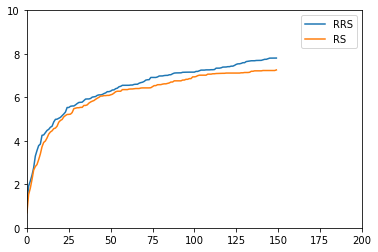

In [16]:
import matplotlib.pyplot as plt

plt.plot(rrs_y, label="RRS")
plt.plot(rs_y, label="RS")

plt.xlim([0, 200])
plt.ylim([0, 10])

plt.legend()
plt.show()